# Credit Card Fraud Detection
Jaime Avendaño

This is a classification notebook that will use a Naive Bayes classifier. The data has been created through a previous PCA transformation.  
The data is also highly unbalanced.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline

In [57]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

In [18]:
data = pd.read_csv('Course_Data\creditcard.csv')
#data = data.clean_names(case_type='snake')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
not_fraud = data[data.Class == 0]
fraud = data[data.Class == 1]
data.shape, not_fraud.shape, fraud.shape

((284807, 31), (284315, 31), (492, 31))

# EDA

In [11]:
data['class'].value_counts()

0    284315
1       492
Name: class, dtype: int64

In [13]:
data.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [24]:
data_cols = data.drop(columns=['Time', 'Amount', 'Class']).columns
data_cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

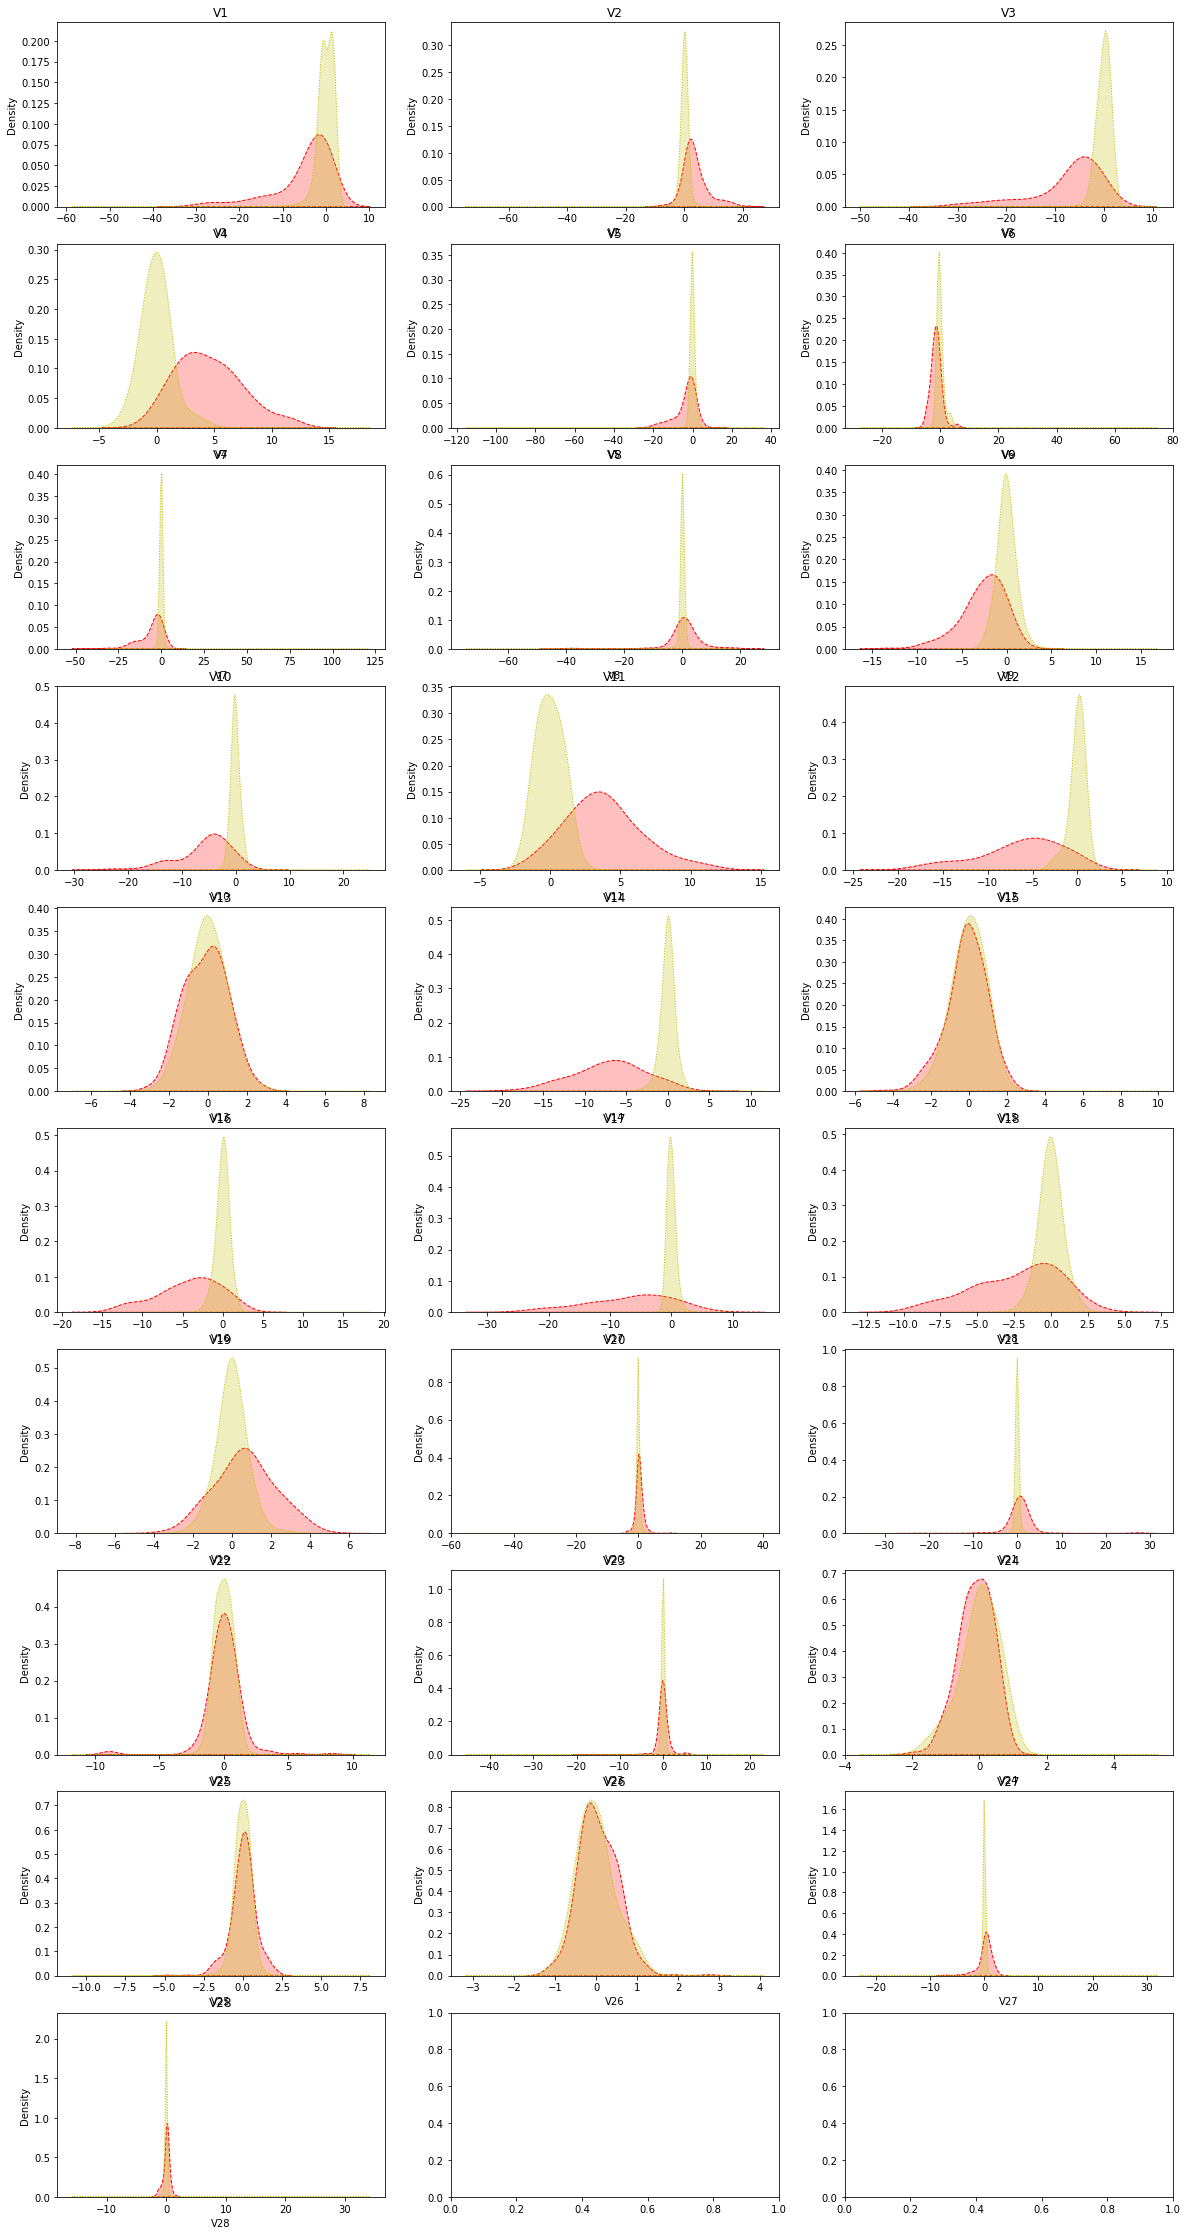

In [27]:
i = 0

fig, ax = plt.subplots(10,3,figsize=(20,40))
for col in data_cols:
    i += 1
    plt.subplot(10,3, i)
    sns.kdeplot(data=fraud, x=col, bw_method=0.4, label="Fraud", shade=True, color="r", linestyle="--")
    sns.kdeplot(data=not_fraud, x=col, bw_method=0.4, label="Non Fraud", shade=True, color= "y", linestyle=":")
    plt.title(col, fontsize=12)
    
plt.show();

# Data Cleaning
1. Drop Time
2. MinMaxScaler on all features

In [36]:
X = data.drop(columns=['Time', 'Class'])
y = data.Class

In [37]:
scaler = MinMaxScaler()
num_features = X.columns

scaler.fit(X)
X = scaler.transform(X)
X[:2]

array([[9.35192337e-01, 7.66490419e-01, 8.81364903e-01, 3.13022659e-01,
        7.63438735e-01, 2.67668642e-01, 2.66815176e-01, 7.86444198e-01,
        4.75311734e-01, 5.10600482e-01, 2.52484319e-01, 6.80907625e-01,
        3.71590602e-01, 6.35590530e-01, 4.46083696e-01, 4.34392391e-01,
        7.37172553e-01, 6.55065861e-01, 5.94863228e-01, 5.82942230e-01,
        5.61184389e-01, 5.22992116e-01, 6.63792975e-01, 3.91252676e-01,
        5.85121795e-01, 3.94556792e-01, 4.18976135e-01, 3.12696634e-01,
        5.82379309e-03],
       [9.78541955e-01, 7.70066651e-01, 8.40298490e-01, 2.71796491e-01,
        7.66120336e-01, 2.62191698e-01, 2.64875439e-01, 7.86298353e-01,
        4.53980968e-01, 5.05267346e-01, 3.81187722e-01, 7.44341569e-01,
        4.86190176e-01, 6.41219007e-01, 3.83839664e-01, 4.64105178e-01,
        7.27793983e-01, 6.40681094e-01, 5.51930422e-01, 5.79529753e-01,
        5.57839915e-01, 4.80236960e-01, 6.66937823e-01, 3.36439996e-01,
        5.87290252e-01, 4.46012969e-01,

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Testing

In [39]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [40]:
y_pred = NB_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

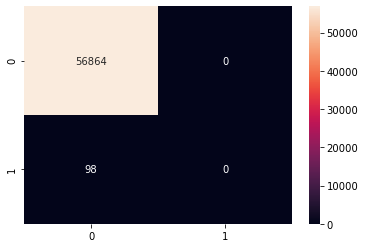

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\jaime.avendano\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
Gaus_classifier = GaussianNB()
Gaus_classifier.fit(X_train, y_train)

GaussianNB()

In [46]:
y_pred_gaus = Gaus_classifier.predict(X_test)
y_pred_gaus

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

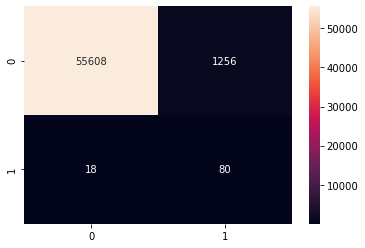

In [47]:
cm = confusion_matrix(y_test, y_pred_gaus)
sns.heatmap(cm, annot=True, fmt='d')

In [49]:
print(classification_report(y_test, y_pred_gaus))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



# Handling unbalanced data

In [58]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())
X_resample.shape, y_resample.shape

((568630, 29), (568630,))

In [62]:
y.value_counts(), np.bincount(y_resample)

(0    284315
 1       492
 Name: Class, dtype: int64,
 array([284315, 284315], dtype=int64))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, 
                                                    test_size=0.2, random_state=42)

In [63]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [64]:
y_pred = NB_classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

<AxesSubplot:>

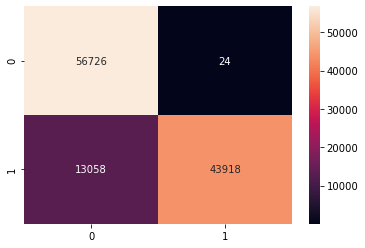

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     56750
           1       1.00      0.77      0.87     56976

    accuracy                           0.88    113726
   macro avg       0.91      0.89      0.88    113726
weighted avg       0.91      0.88      0.88    113726



In [67]:
Gaus_classifier = GaussianNB()
Gaus_classifier.fit(X_train, y_train)

GaussianNB()

In [68]:
y_pred_gaus = Gaus_classifier.predict(X_test)
y_pred_gaus

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

<AxesSubplot:>

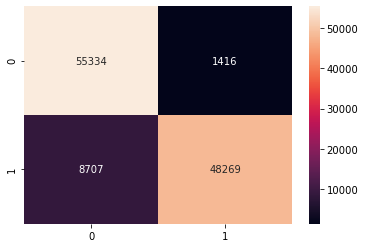

In [69]:
cm = confusion_matrix(y_test, y_pred_gaus)
sns.heatmap(cm, annot=True, fmt='d')

In [70]:
print(classification_report(y_test, y_pred_gaus))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     56750
           1       0.97      0.85      0.91     56976

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726



<AxesSubplot:>

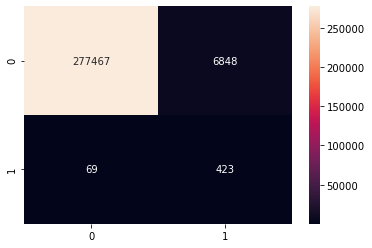

In [71]:
y_predict = Gaus_classifier.predict(X)
cm = confusion_matrix(y, y_predict)
sns.heatmap(cm, annot=True, fmt='d')

In [72]:
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.06      0.86      0.11       492

    accuracy                           0.98    284807
   macro avg       0.53      0.92      0.55    284807
weighted avg       1.00      0.98      0.99    284807

